# Seaborn style, color and formatting

Notes based on (and often copied-and-pasted from) the [seaborn documentation](http://stanford.edu/~mwaskom/software/seaborn-dev/).

The best quick overview to the matplotlib API on which seaborn is based is [Jake VanderPlas's PyData 2014 presentation](https://github.com/jakevdp/PyData2014).

In [1]:
from __future__ import print_function, division
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sinplot():
    fig, ax = plt.subplots()
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        ax.plot(x, np.sin(x + i * .5) * (7 - i))

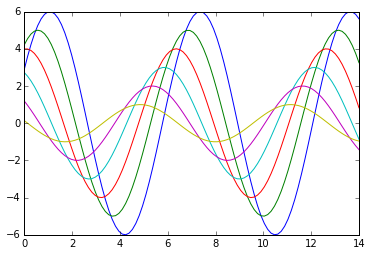

In [3]:
sinplot()

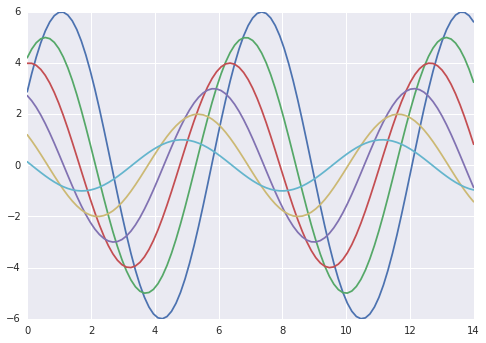

In [7]:
import seaborn as sns
sns.set_style('darkgrid')  # use this for a global change (all plots)
sinplot()

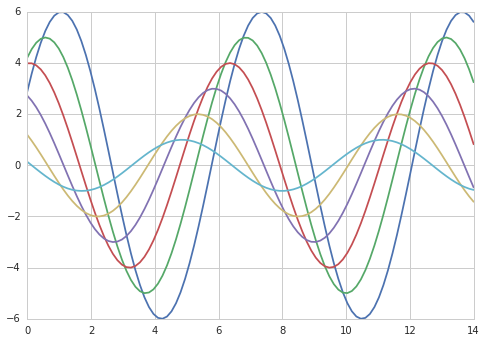

In [8]:
sns.set_style('whitegrid')
sinplot()

Seaborn splits matplotlib parameters into two independent groups. The first group sets the aesthetic style of the plot, and the second scales various elements of the figure so that it can be easily incorporated into different contexts.

The interface for manipulating these parameters are two pairs of functions. To control the style, use the `axes_style()` and `set_style()` functions. To scale the plot, use the `plotting_context()` and `set_context()` functions. In both cases, the first function returns a dictionary of parameters and the second sets the matplotlib defaults.

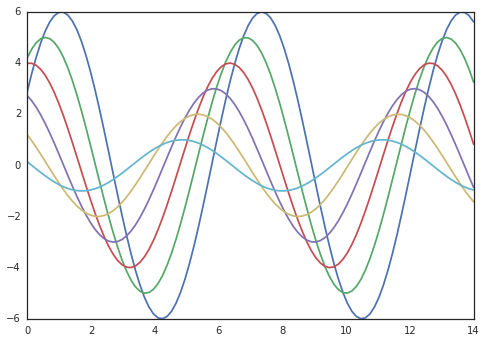

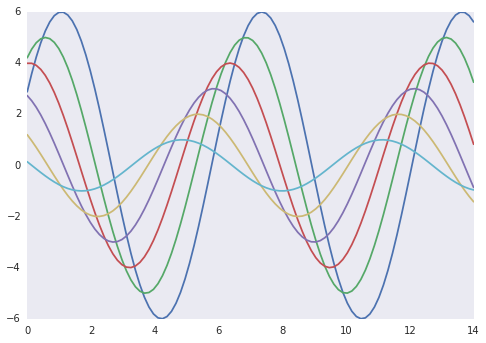

In [9]:
sns.set_style('dark')  # global change
with sns.axes_style('white'):  # use `with` and `axes_style` for local change
    sinplot()
sinplot()

If you want to customize the seaborn styles, you can pass a dictionary of parameters to the rc argument of `axes_style()` and `set_style()`. Note that you can only override the parameters that are part of the style definition through this method. (However, the higher-level `set()` function takes a dictionary of any matplotlib parameters).

If you want to see what parameters are included, you can just call the function with no arguments, which will return the current settings:

In [10]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': [u'sans-serif'],
 'font.sans-serif': [u'Arial',
  u'Liberation Sans',
  u'Bitstream Vera Sans',
  u'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': u'-',
 'image.cmap': u'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': u'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': u'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': u'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

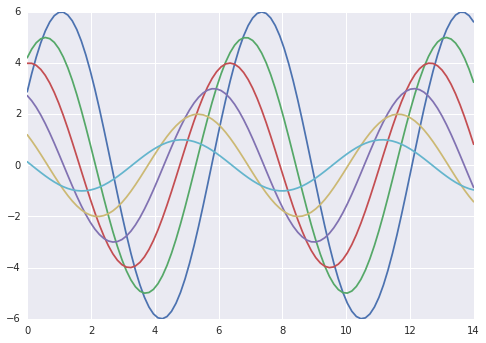

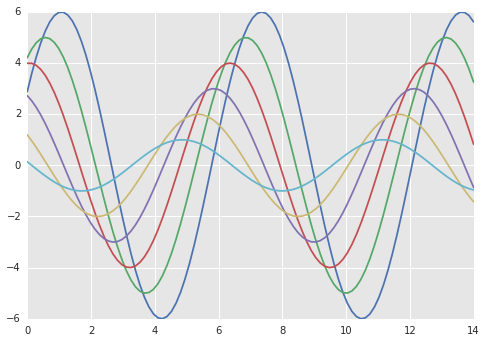

In [11]:
sns.set()  # resets defaults
sinplot()
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()

Contexts are for scaling plot elements.

The four preset contexts, in order of relative size, are paper, notebook, talk, and poster. The notebook style is the default, and was used in the plots above.

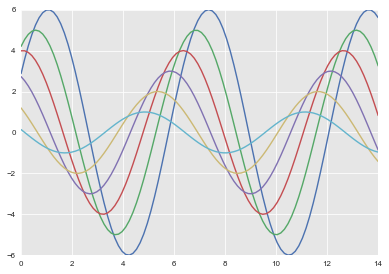

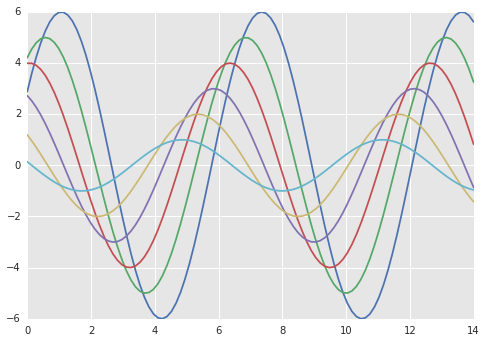

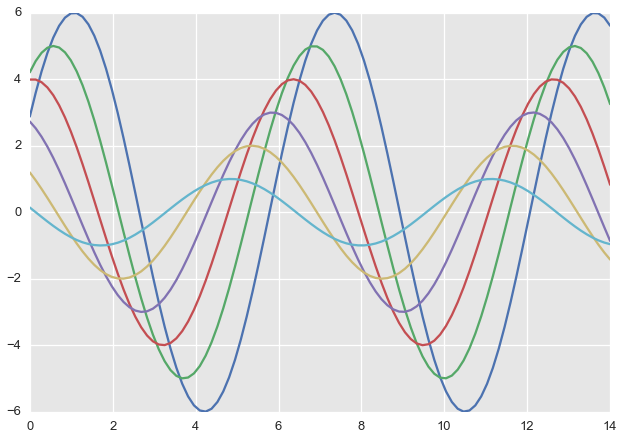

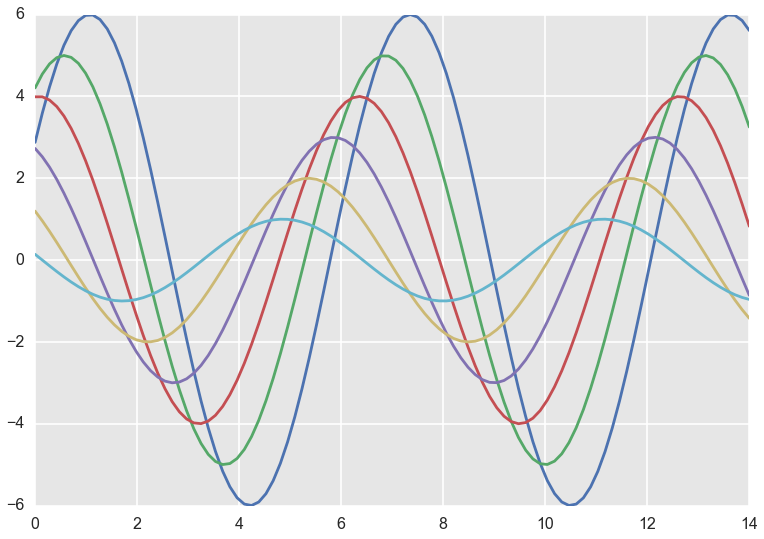

In [12]:
sns.set_context("paper")
sinplot()
sns.set_context("notebook")
sinplot()
sns.set_context("talk")
sinplot()
sns.set_context("poster")
sinplot()

In [13]:
sns.plotting_context()

{'axes.labelsize': 17.6,
 'axes.titlesize': 19.200000000000003,
 'figure.figsize': [12.8, 8.8],
 'grid.linewidth': 1.6,
 'legend.fontsize': 16.0,
 'lines.linewidth': 2.8000000000000003,
 'lines.markeredgewidth': 0.0,
 'lines.markersize': 11.200000000000001,
 'patch.linewidth': 0.48,
 'xtick.labelsize': 16.0,
 'xtick.major.pad': 11.200000000000001,
 'xtick.major.width': 1.6,
 'xtick.minor.width': 0.8,
 'ytick.labelsize': 16.0,
 'ytick.major.pad': 11.200000000000001,
 'ytick.major.width': 1.6,
 'ytick.minor.width': 0.8}

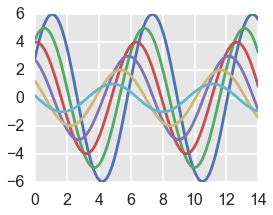

In [14]:
sns.set_context('poster', rc={'figure.figsize': [4,3]})
sinplot()

# Colors

## Qualitative

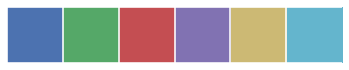

In [15]:
current_palette = sns.color_palette()  # seaborn default
sns.palplot(current_palette)

There are six variations of the default theme, called deep, muted, pastel, bright, dark, and colorblind.

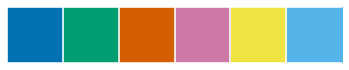

In [16]:
current_palette = sns.color_palette('colorblind')
sns.palplot(current_palette)

Matplotlib cmaps are valid

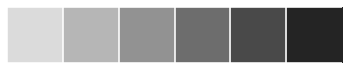

In [17]:
current_palette = sns.color_palette('binary')
sns.palplot(current_palette)

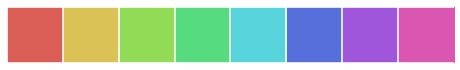

In [18]:
sns.palplot(sns.color_palette("hls", 8))  # evenly spaced in hue with constant brightness and saturation, nocolors

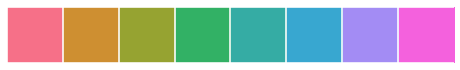

In [19]:
sns.palplot(sns.color_palette("husl", 8))  # husl does a better job with 'apparent' brightness

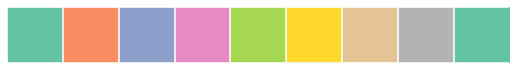

In [21]:
brewer_palette = sns.choose_colorbrewer_palette('qualitative')

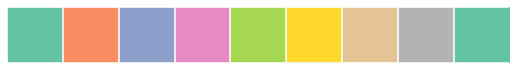

In [22]:
sns.palplot(brewer_palette)

## Using palettes

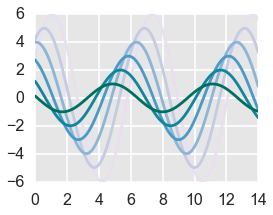

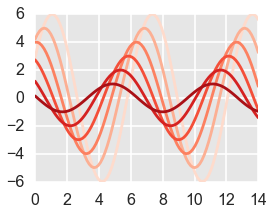

In [25]:
sns.set_palette("PuBuGn")
sinplot()

sns.set_palette("Reds")
sinplot()

## Sequential
The second major class of color palettes is called “sequential”. This kind of color mapping is appropriate when data range from relatively low or unintersting values to relatively high or interesting values. A

For sequential data, it’s better to use palettes that have at most a relatively subtle shift in hue accompanied by a large shift in brightness and saturation. This approach will naturally draw the eye to the relatively important parts of the data.

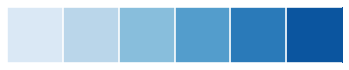

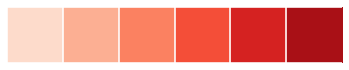

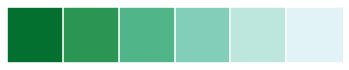

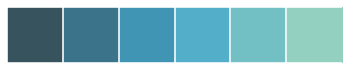

In [26]:
sns.palplot(sns.color_palette("Blues"))
sns.palplot(sns.color_palette("Reds"))  # etc.
sns.palplot(sns.color_palette("BuGn_r"))  # reversed
sns.palplot(sns.color_palette("GnBu_d"))  # darker

The cubehelix color palette system makes sequential palettes with a linear increase or decrease in brightness and some variation in hue. This means that the information in your colormap will be preserved when converted to black and white (for printing) or when viewed by a colorblind individual.

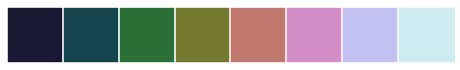

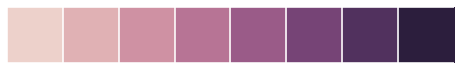

In [27]:
sns.palplot(sns.color_palette("cubehelix", 8))  # matplotlib default
sns.palplot(sns.cubehelix_palette(8))  # seaborn default (less of color wheel, reversed order)

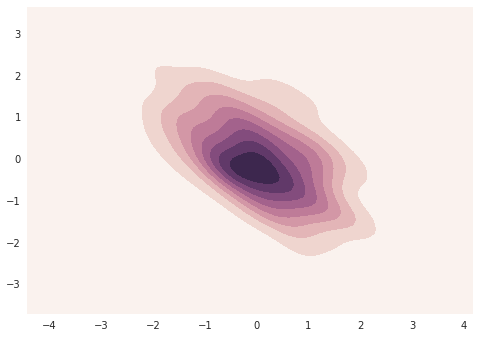

In [28]:
sns.set()
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T

# can return a cmap object for seaborn/matplotlib functions that need it
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True);

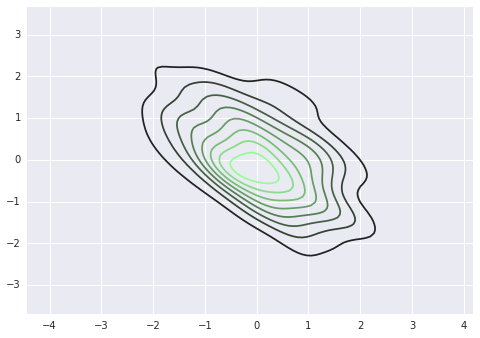

In [29]:
pal = sns.dark_palette("palegreen", as_cmap=True)  # dark_palette and light_palette are similar
sns.kdeplot(x, y, cmap=pal);

## Diverging colors

The third class of color palettes is called “diverging”. These are used for data where both large low and high values are interesting. There is also usually a well-defined midpoint in the data. For instance, if you are plotting changes in temperature from some baseline timepoint, it is best to use a diverging colormap to show areas with relative decreases and areas with relative increases.

In [ ]:
brewer_palette = sns.choose_colorbrewer_palette('d')

In [ ]:
sns.palplot(sns.color_palette('RdBu', 9))

In [ ]:
sns.kdeplot(x, y, cmap='RdBu_r', shade=True);  # accepts valid seaborn color_palette aliases